In [2]:
import pandas as pd

from pathlib import Path

In [3]:
# Import training dataset
dataset = Path('../dataset')

df = pd.read_csv('/Users/mattammirati/Downloads/accidents_train.csv')

df.head()

,Num,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,3,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,5,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
print(df.columns)

Index(['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [5]:
target = 'Accident_severity'
my_list = df.columns.tolist()
set1 = my_list[0:11]
set1.append(target)
print(len(set1), set1)

12 ['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Accident_severity']


In [6]:
selected_columns = ['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Accident_severity']
df_matt = df[selected_columns]

In [7]:
print(df_matt.dtypes)

Num                         int64
Time                       object
Day_of_week                object
Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Type_of_vehicle            object
Owner_of_vehicle           object
Service_year_of_vehicle    object
Accident_severity          object
dtype: object


In [8]:
print(df_matt.describe)

<bound method NDFrame.describe of        Num      Time Day_of_week Age_band_of_driver Sex_of_driver  \
0        1  17:02:00      Monday              18-30          Male   
1        2  17:02:00      Monday              31-50          Male   
2        3  17:02:00      Monday              18-30          Male   
3        4   1:06:00      Sunday              18-30          Male   
4        5   1:06:00      Sunday              18-30          Male   
...    ...       ...         ...                ...           ...   
8205  8206  17:40:00      Monday              18-30          Male   
8206  8207  17:45:00     Tuesday            Over 51          Male   
8207  8208  17:45:00     Tuesday              18-30          Male   
8208  8209   8:25:00    Thursday              18-30          Male   
8209  8210   8:25:00    Thursday              31-50          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
0      Above high school                Employee              1-2y

In [9]:
print(df_matt.shape)

(8210, 12)


In [10]:
print(df_matt.isnull().sum())

Num                           0
Time                          0
Day_of_week                   0
Age_band_of_driver            0
Sex_of_driver                 0
Educational_level           476
Vehicle_driver_relation     340
Driving_experience          545
Type_of_vehicle             652
Owner_of_vehicle            321
Service_year_of_vehicle    2705
Accident_severity             0
dtype: int64


In [11]:
df_matt_cleaned = df_matt.copy()

Replace the null values with the mode of each column

In [12]:
for column in df_matt_cleaned.columns:
    if df_matt_cleaned[column].dtype == 'object' or df_matt_cleaned[column].dtype == 'category':
        mode_value = df_matt_cleaned[column].mode()[0]
        df_matt_cleaned[column].fillna(mode_value, inplace=True)


/var/folders/pl/4pny6kms2p307m4vtyh01smr0000gn/T/ipykernel_77843/3159796969.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matt_cleaned[column].fillna(mode_value, inplace=True)


In [13]:
print(df_matt_cleaned.isnull().sum())

Num                        0
Time                       0
Day_of_week                0
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Type_of_vehicle            0
Owner_of_vehicle           0
Service_year_of_vehicle    0
Accident_severity          0
dtype: int64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [15]:
print(df_matt_cleaned.head())

   Num      Time Day_of_week Age_band_of_driver Sex_of_driver  \
0    1  17:02:00      Monday              18-30          Male   
1    2  17:02:00      Monday              31-50          Male   
2    3  17:02:00      Monday              18-30          Male   
3    4   1:06:00      Sunday              18-30          Male   
4    5   1:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   

In [16]:
for column in df_matt_cleaned.columns:
    if df_matt_cleaned[column].dtype == 'object':
        print(f"\nFrequency distribution for {column}:\n", df_matt_cleaned[column].value_counts())


Frequency distribution for Time:
 Time
16:00:00    76
18:00:00    76
17:00:00    73
18:30:00    69
17:30:00    66
            ..
0:43:00      1
15:22:00     1
19:24:00     1
22:54:00     1
14:54:00     1
Name: count, Length: 1027, dtype: int64

Frequency distribution for Day_of_week:
 Day_of_week
Friday       1326
Thursday     1288
Wednesday    1250
Tuesday      1169
Monday       1139
Saturday     1127
Sunday        911
Name: count, dtype: int64

Frequency distribution for Age_band_of_driver:
 Age_band_of_driver
18-30       2728
31-50       2688
Unknown     1323
Over 51      933
Under 18     538
Name: count, dtype: int64

Frequency distribution for Sex_of_driver:
 Sex_of_driver
Male       7582
Female      462
Unknown     166
Name: count, dtype: int64

Frequency distribution for Educational_level:
 Educational_level
Junior high school    5540
Elementary school     1457
High school            754
Above high school      224
Writing & reading      138
Unknown                 65
Illiterate

In [17]:
import numpy as np

In [18]:
print("\nMode for num is ", df_matt_cleaned['Num'].mode()[0])
print("Median for num is ", df_matt_cleaned['Num'].median())

pq3,pq1 = np.percentile(df_matt_cleaned['Num'], [75,25])

iqr = pq3-pq1
print("IQR for Num is ", iqr)


Mode for num is  1
Median for num is  4105.5
IQR for Num is  4104.5


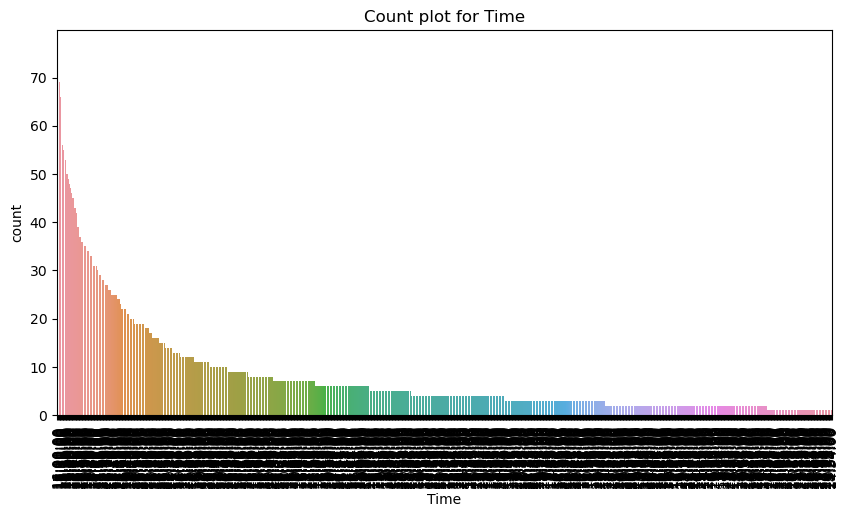

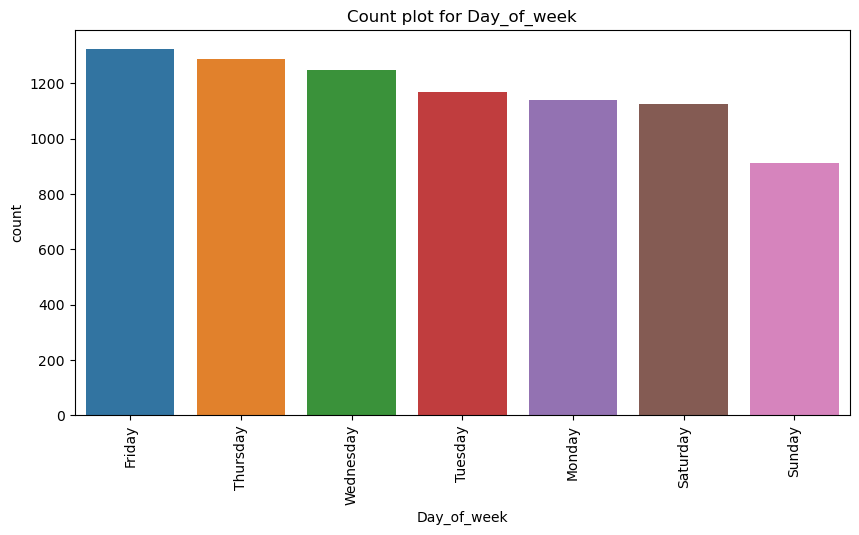

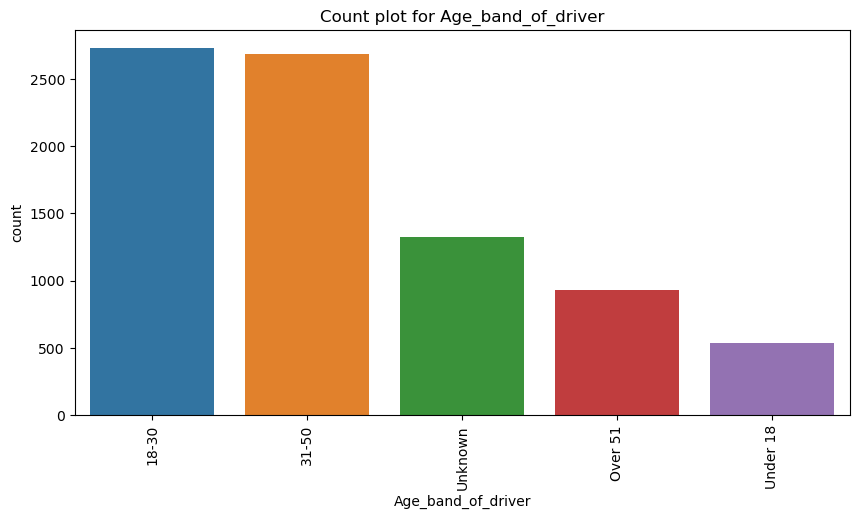

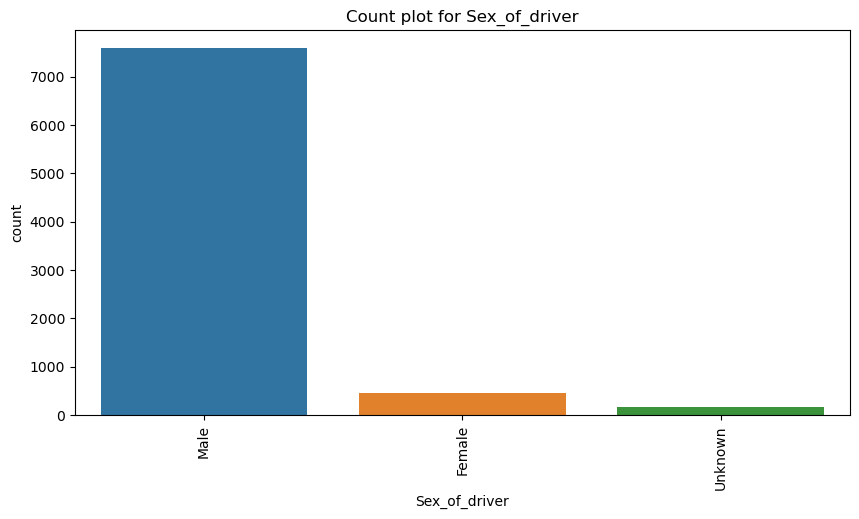

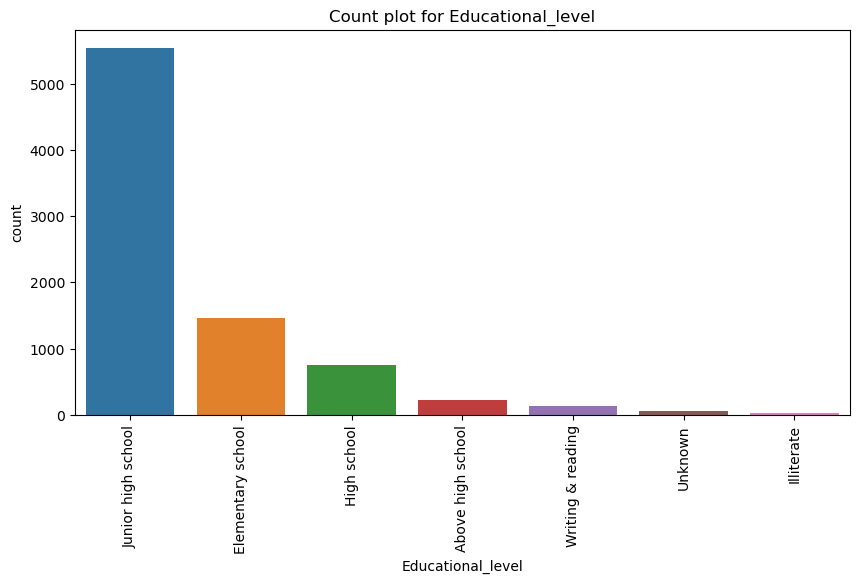

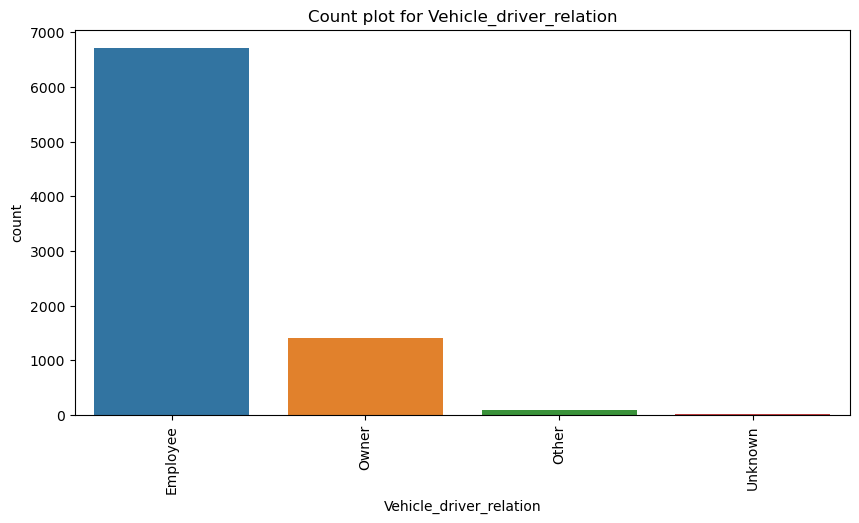

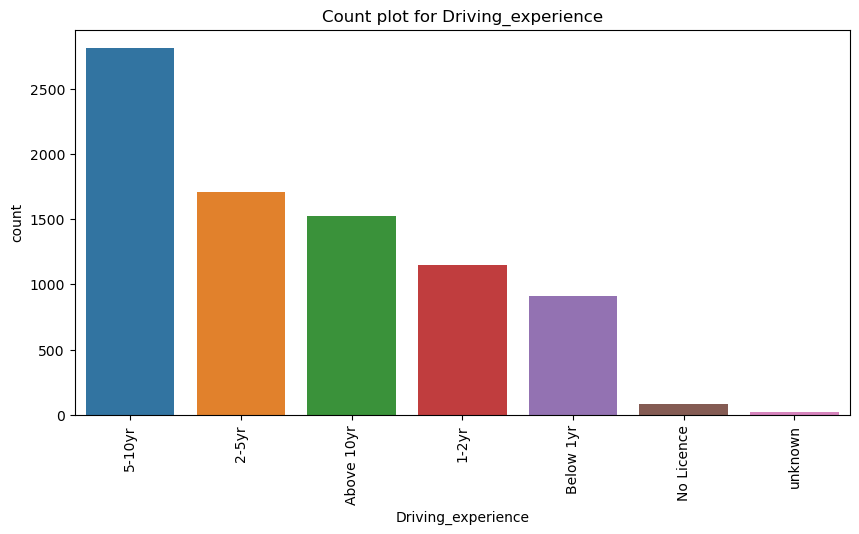

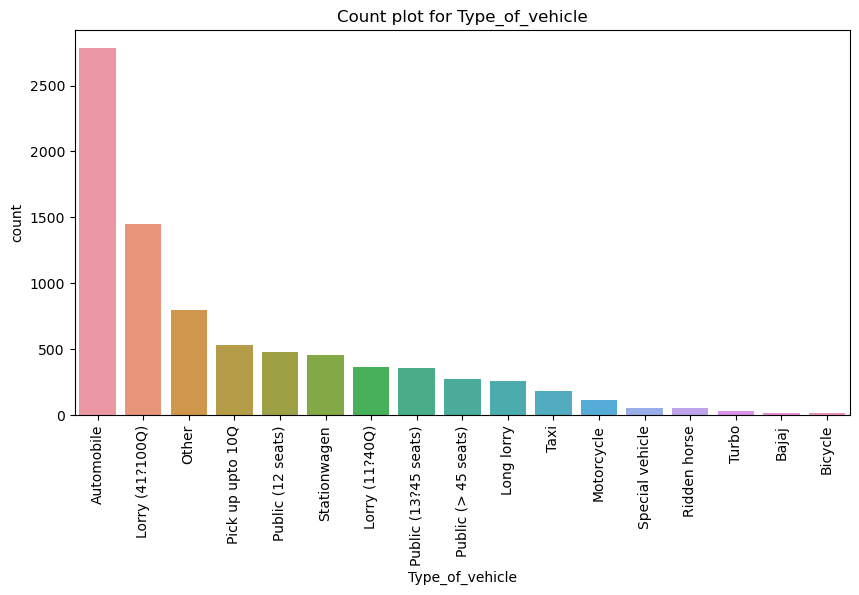

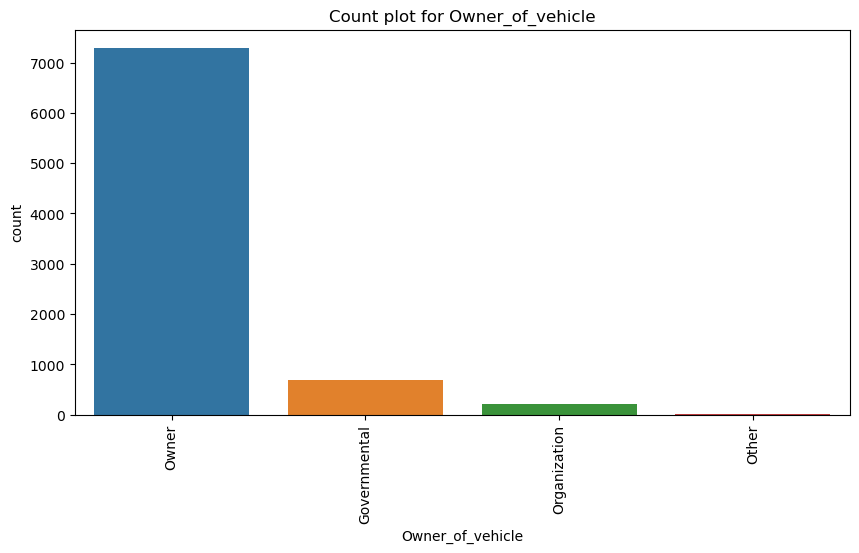

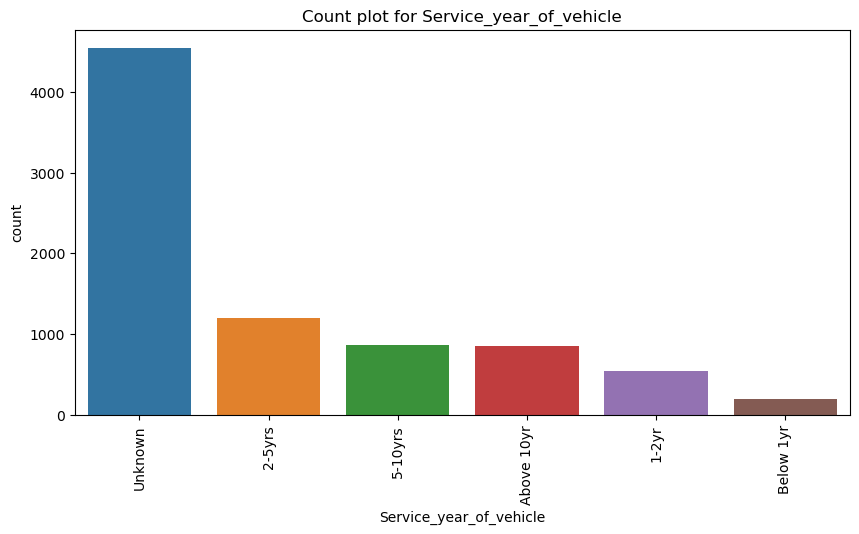

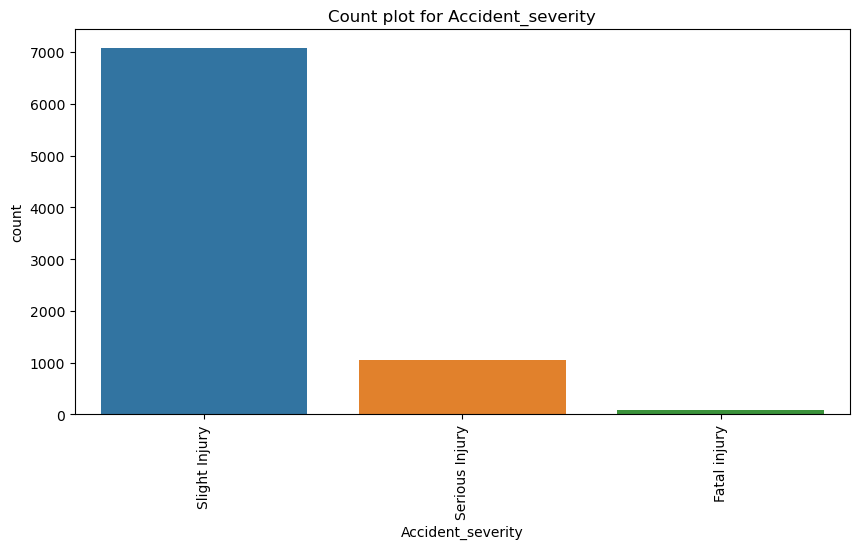

In [19]:
for column in df_matt_cleaned.columns:
    if df_matt_cleaned[column].dtype == 'object':
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df_matt_cleaned, x=column, order=df_matt_cleaned[column].value_counts().index)
        plt.xticks(rotation=90)
        plt.title(f"Count plot for {column}")
        plt.show()

/Users/mattammirati/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


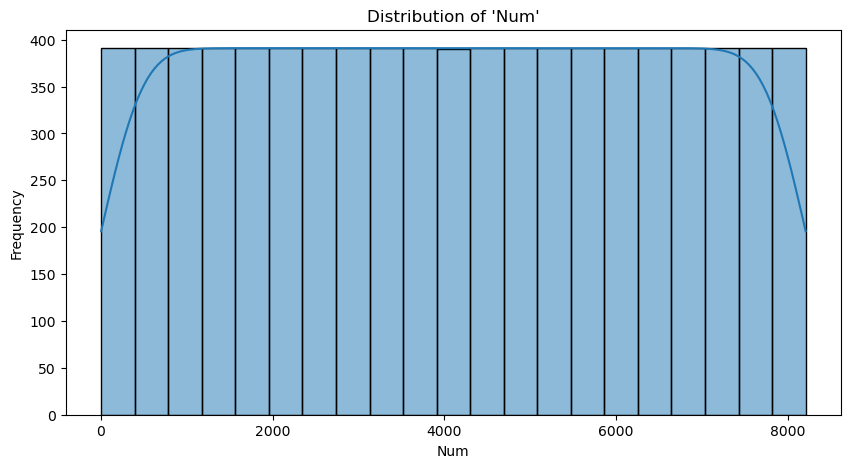

In [20]:
if 'Num' in df_matt_cleaned.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_matt_cleaned['Num'], kde=True)
    plt.title("Distribution of 'Num'")
    plt.xlabel("Num")
    plt.ylabel("Frequency")
    plt.show()

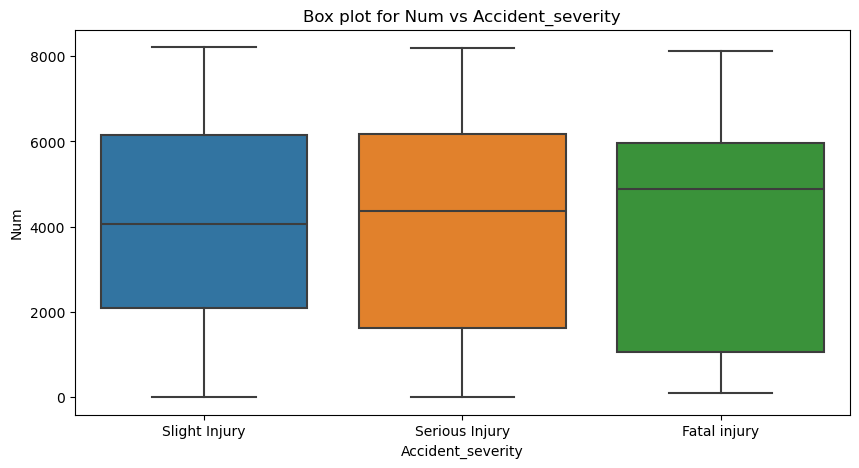


Summary statistics for Num by Accident_severity:
                    count         mean          std   min      25%     50%  \
Accident_severity                                                            
Fatal injury         82.0  4207.951220  2495.144756  90.0  1063.25  4885.5   
Serious Injury     1046.0  4085.738050  2471.899158   3.0  1610.25  4376.0   
Slight Injury      7082.0  4107.232561  2353.602660   1.0  2094.25  4061.5   

                       75%     max  
Accident_severity                   
Fatal injury       5968.75  8114.0  
Serious Injury     6176.75  8197.0  
Slight Injury      6154.75  8210.0   



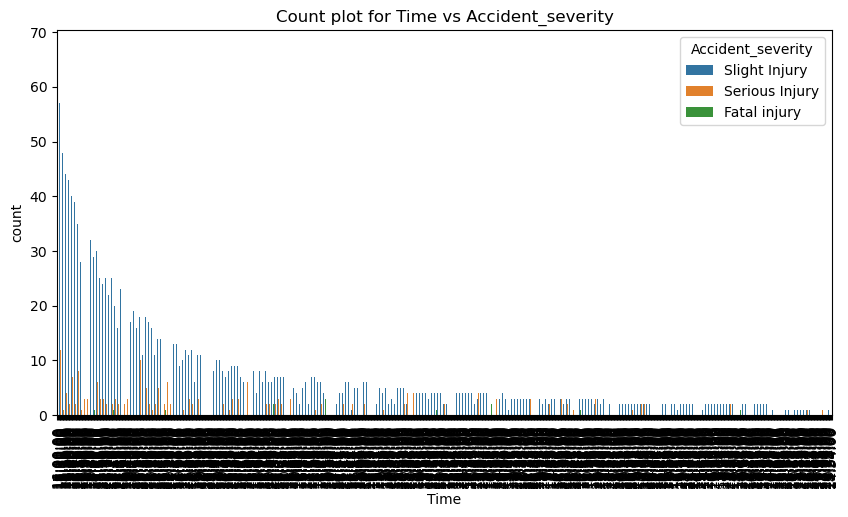


Chi-Square Test results for Time vs Accident_severity:
Chi2 Stat: 5890.165646544385, p-value: 0.0



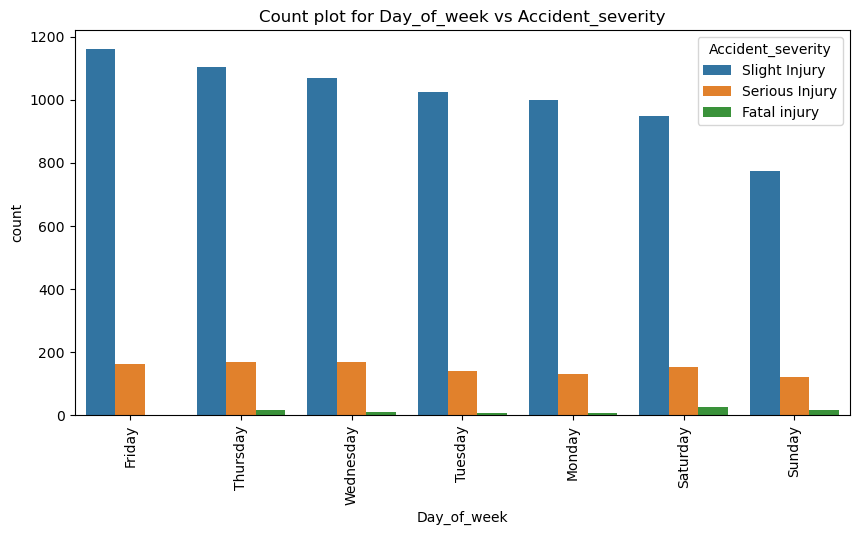


Chi-Square Test results for Day_of_week vs Accident_severity:
Chi2 Stat: 40.01753132688368, p-value: 7.142862409371859e-05



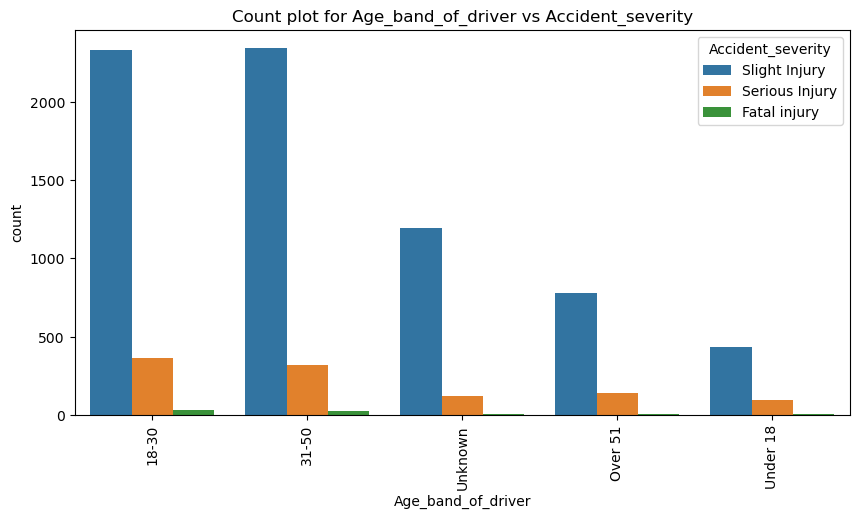


Chi-Square Test results for Age_band_of_driver vs Accident_severity:
Chi2 Stat: 44.406175437055005, p-value: 4.767492656555021e-07



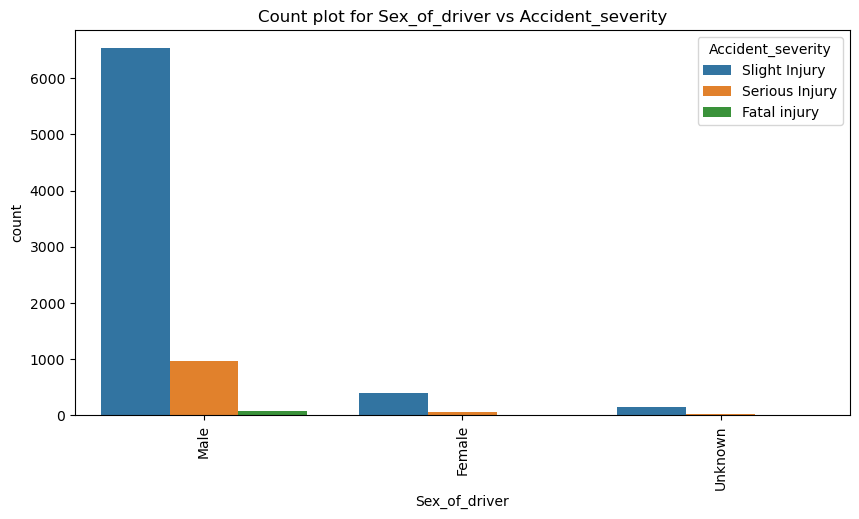


Chi-Square Test results for Sex_of_driver vs Accident_severity:
Chi2 Stat: 2.0066350826267967, p-value: 0.7345384293334768



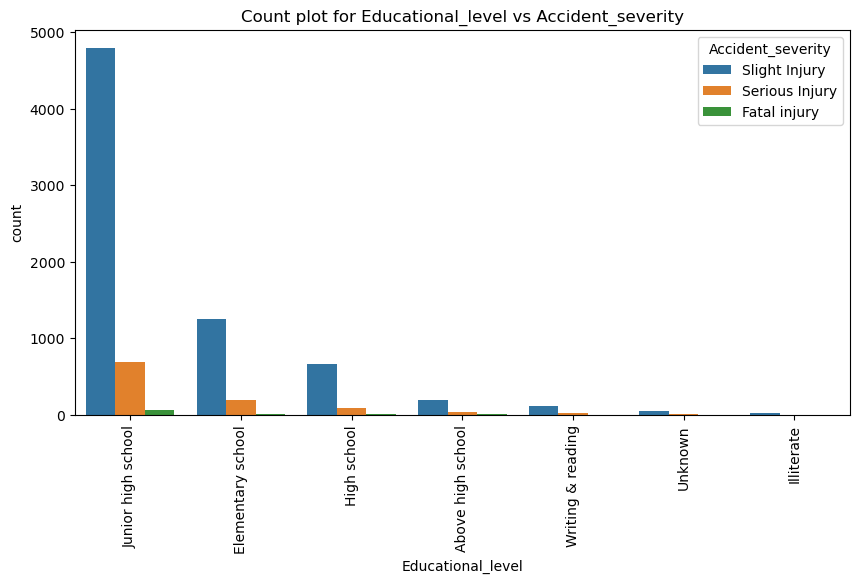


Chi-Square Test results for Educational_level vs Accident_severity:
Chi2 Stat: 11.167676540591525, p-value: 0.5146061174442822



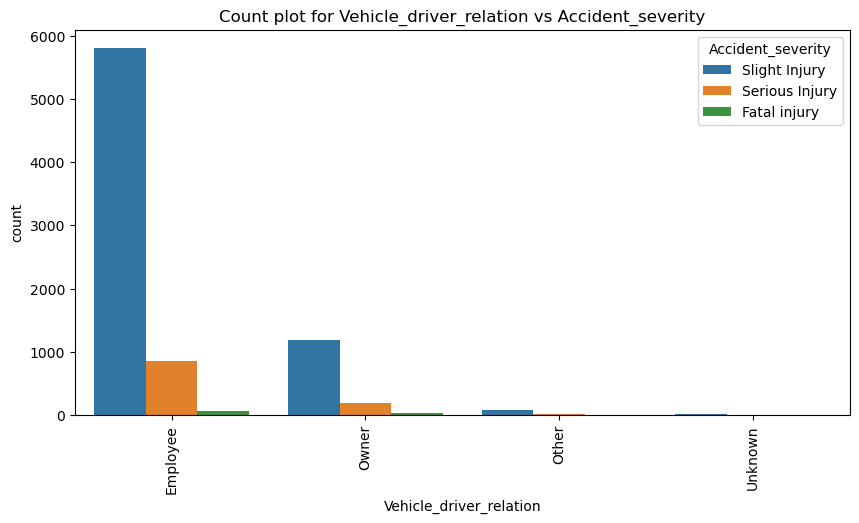


Chi-Square Test results for Vehicle_driver_relation vs Accident_severity:
Chi2 Stat: 11.078032481406902, p-value: 0.08599447681287752



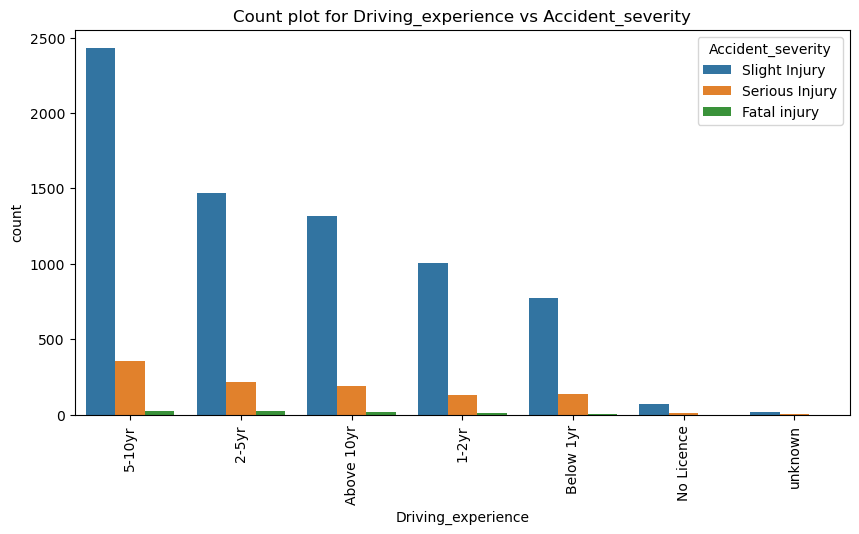


Chi-Square Test results for Driving_experience vs Accident_severity:
Chi2 Stat: 14.517552444887768, p-value: 0.2688854071998473



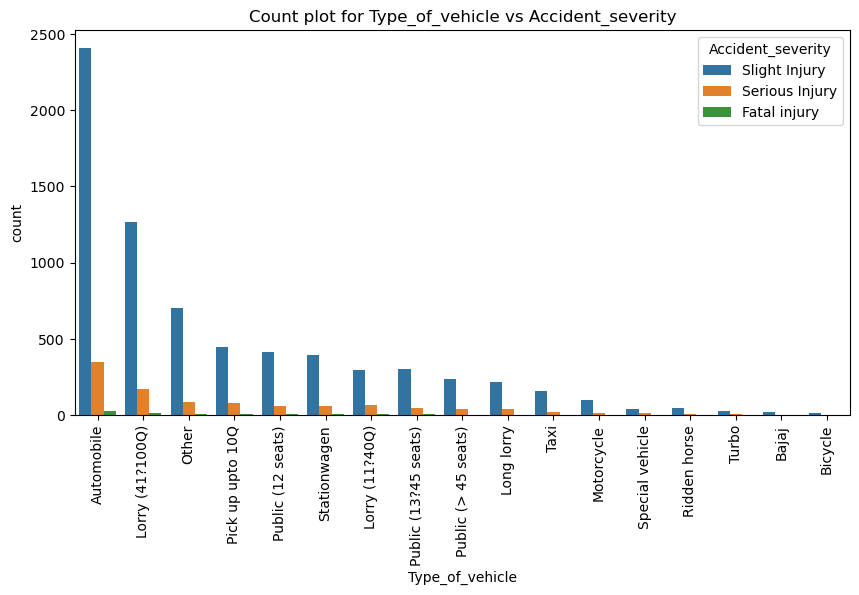


Chi-Square Test results for Type_of_vehicle vs Accident_severity:
Chi2 Stat: 43.06394541090455, p-value: 0.09160985848944223



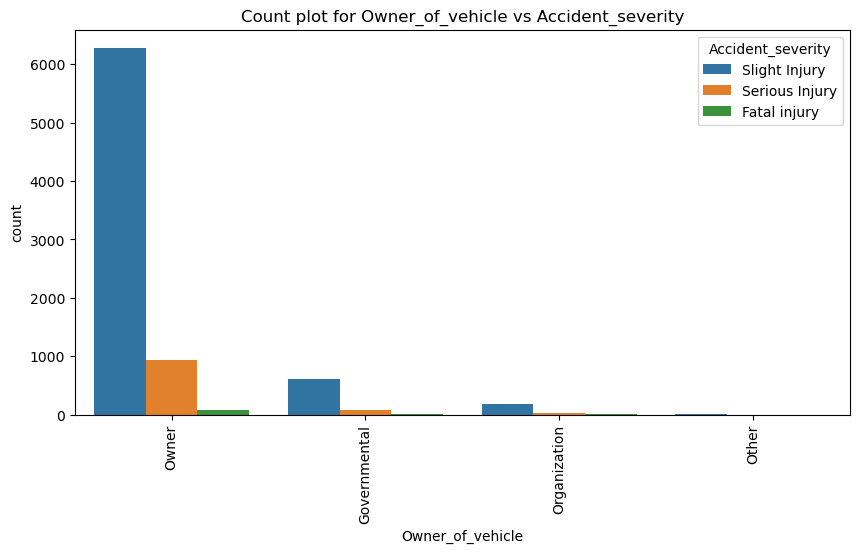


Chi-Square Test results for Owner_of_vehicle vs Accident_severity:
Chi2 Stat: 4.8690355699772985, p-value: 0.560716870417195



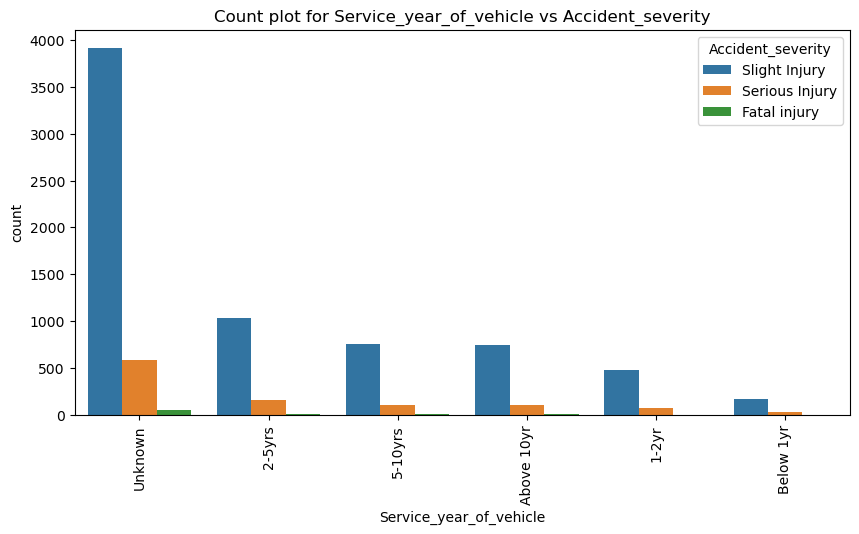


Chi-Square Test results for Service_year_of_vehicle vs Accident_severity:
Chi2 Stat: 3.3552187111115326, p-value: 0.971787163822214



In [21]:
for column in df_matt_cleaned.columns:
    if column != 'Accident_severity':
        if df_matt_cleaned[column].dtype == 'object':
            plt.figure(figsize=(10, 5))
            sns.countplot(data=df_matt_cleaned, x=column, hue='Accident_severity', order=df_matt_cleaned[column].value_counts().index)
            plt.xticks(rotation=90)
            plt.title(f"Count plot for {column} vs Accident_severity")
            plt.show()


            cross_tab = pd.crosstab(df_matt_cleaned[column], df_matt_cleaned['Accident_severity'])
            chi2_stat, p_val, dof, ex = chi2_contingency(cross_tab)
            print(f"\nChi-Square Test results for {column} vs Accident_severity:")
            print(f"Chi2 Stat: {chi2_stat}, p-value: {p_val}\n")

        elif pd.api.types.is_numeric_dtype(df_matt_cleaned[column]):
            plt.figure(figsize=(10, 5))
            sns.boxplot(data=df_matt_cleaned, x='Accident_severity', y=column)
            plt.title(f"Box plot for {column} vs Accident_severity")
            plt.show()


            print(f"\nSummary statistics for {column} by Accident_severity:")
            print(df_matt_cleaned.groupby('Accident_severity')[column].describe(), "\n")


In [22]:
print(df_matt_cleaned.columns)

Index(['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Accident_severity'],
      dtype='object')


                    Feature  Chi-Square Score       P-Value
1                      Time        375.352440  3.113532e-82
0                       Num        314.322372  5.568833e-69
3        Age_band_of_driver         11.921414  2.578089e-03
6   Vehicle_driver_relation         11.637317  2.971588e-03
7        Driving_experience          4.727723  9.405632e-02
8           Type_of_vehicle          2.038530  3.608601e-01
2               Day_of_week          1.872532  3.920893e-01
10  Service_year_of_vehicle          0.839878  6.570869e-01
9          Owner_of_vehicle          0.572299  7.511504e-01
5         Educational_level          0.276298  8.709687e-01
4             Sex_of_driver          0.017023  9.915244e-01


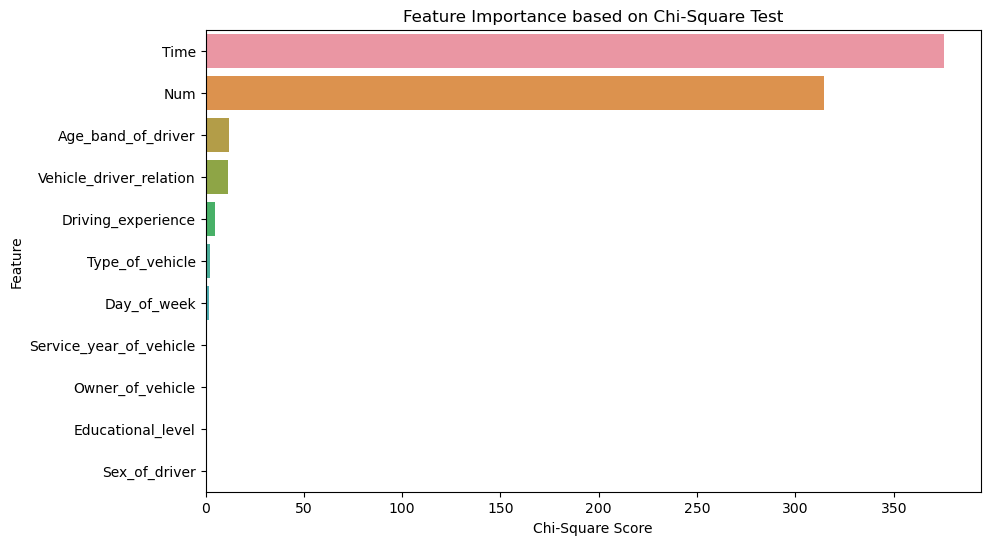

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt



label_encoder = LabelEncoder()


categorical_columns = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
                       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
                       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle']

for col in categorical_columns:
    df_matt_cleaned[col] = label_encoder.fit_transform(df_matt_cleaned[col])


df_matt_cleaned['Accident_severity'] = label_encoder.fit_transform(df_matt_cleaned['Accident_severity'])


X = df_matt_cleaned.drop(columns=['Accident_severity'])
y = df_matt_cleaned['Accident_severity']


best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)


feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': fit.scores_, 'P-Value': fit.pvalues_})


print(feature_scores.sort_values(by='Chi-Square Score', ascending=False))


plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Square Score', y='Feature', data=feature_scores.sort_values(by='Chi-Square Score', ascending=False))
plt.title('Feature Importance based on Chi-Square Test')
plt.show()


Starting the NN models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
df_clean['Accident_severity'] = label_encoder.fit_transform(df_clean['Accident_severity'])

X = df_clean.drop(columns=['Accident_severity'])
y = df_clean['Accident_severity']

categorical_variables = X.columns.tolist()

preprocessor = ColumnTransformer(
  transformers = [('cat', OneHotEncoder(), categorical_variables)]
)

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.02, random_state=42)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

def plot_learning_curves(history):

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Example: Call this function after training your model
plot_learning_curves(history)

loss, accuracy =  model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'Accuracy: {accuracy}')

NameError: name 'df_clean' is not defined

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

ITERATION 2
Since we had high restuts in the training set and lower validation we will first add some regulization to see if that helps

Epoch 1/100


/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7585 - loss: 0.6927 - val_accuracy: 0.8626 - val_loss: 0.4377
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8601 - loss: 0.4864 - val_accuracy: 0.8626 - val_loss: 0.4364
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8601 - loss: 0.4691 - val_accuracy: 0.8626 - val_loss: 0.4338
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8683 - loss: 0.4429 - val_accuracy: 0.8626 - val_loss: 0.4369
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 0.4345 - val_accuracy: 0.8626 - val_loss: 0.4353
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8582 - loss: 0.4481 - val_accuracy: 0.8626 - val_loss: 0.4310
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.4306 - val_accuracy: 0.8626 - val_loss: 0.4312
Epoch 8/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8641 - loss: 0.4253 - val_accuracy: 0.8626

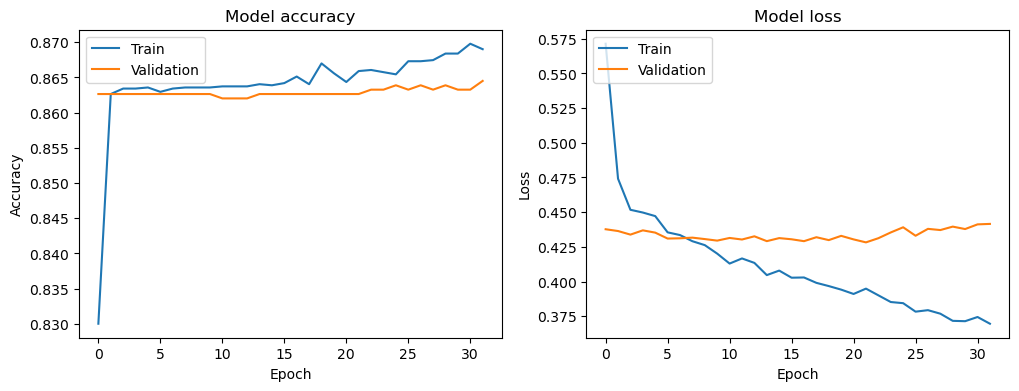

Accuracy: 0.8303030133247375


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
df_clean['Accident_severity'] = label_encoder.fit_transform(df_clean['Accident_severity'])

X = df_clean.drop(columns=['Accident_severity'])
y = df_clean['Accident_severity']

categorical_variables = X.columns.tolist()

preprocessor = ColumnTransformer(
  transformers = [('cat', OneHotEncoder(), categorical_variables)]
)

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.02, random_state=42)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

def plot_learning_curves(history):

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()


plot_learning_curves(history)

loss, accuracy =  model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'Accuracy: {accuracy}')

In [ ]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from pathlib import Path
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df = df_clean.copy()

In [ ]:
df.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30,2
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50,2
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30,1
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30,2
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30,2


In [ ]:
columns = df.columns.to_list()
features = ['Area_accident_occured', 'Types_of_Junction', 'Light_conditions', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Cause_of_accident', 'Day_of_week', 'Sex_of_driver', 'Age_band_of_driver']

target = 'Accident_severity'

In [ ]:
X = df[features]
X = pd.get_dummies(X, drop_first=True)
X.head()

,Number_of_vehicles_involved,Number_of_casualties,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Industrial areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Office areas,Area_accident_occured_Other,Area_accident_occured_Recreational areas,...,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Sex_of_driver_Male,Sex_of_driver_Unknown,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown
0,2,2,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
2,2,2,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2,2,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
4,2,2,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
df['Accident_slight'] = df[target].map(
    {'Slight Injury': 0}
    ).fillna(1).astype(int)
df['Accident_serious'] = df[target].map(
    {'Serious Injury': 0}
    ).fillna(1).astype(int)
df['Accident_severity_mapped'] = df[target].map({
    'Serious Injury': 0,
    'Slight Injury': 1,
    'Fatal injury': 2
    })

df.head()

,Area_accident_occured,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity,Accident_slight,Accident_serious,Accident_severity_mapped
0,Residential areas,No junction,Daylight,2,2,Moving Backward,Monday,Male,18-30,2,1,1,NaN
1,Office areas,No junction,Daylight,2,2,Overtaking,Monday,Male,31-50,2,1,1,NaN
2,Recreational areas,No junction,Daylight,2,2,Changing lane to the left,Monday,Male,18-30,1,1,1,NaN
3,Office areas,Y Shape,Darkness - lights lit,2,2,Changing lane to the right,Sunday,Male,18-30,2,1,1,NaN
4,Industrial areas,Y Shape,Darkness - lights lit,2,2,Overtaking,Sunday,Male,18-30,2,1,1,NaN


In [25]:
df.shape

(8210, 33)

In [ ]:
y = df[target]
y_mapped = df['Accident_severity_mapped']
y_slight = df['Accident_slight']
y_serious = df['Accident_serious']

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np


label_encoder = LabelEncoder()
df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])


X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']


categorical_variables = X.columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_variables)]
)


X_encoded = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)


y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

def create_model(optimizer='adam', activation='relu', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model = KerasClassifier(model=create_model, verbose=0)


def nn_report(test, pred):
    print("Accuracy: ", accuracy_score(test, pred))
    print("Confusion Matrix:\n", confusion_matrix(test, pred))
    print("Classification Report:\n", classification_report(test, pred))

def cross_scores(score):
    print("Cross-validation scores: ", score)
    print("Average score: ", score.mean())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

nn_model = create_model()
history = nn_model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

y_pred_prob = nn_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

nn_report(y_test, y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(X_encoded):
    X_train_cv, X_test_cv = X_encoded[train_index], X_encoded[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]
    y_train_cv_encoded = to_categorical(y_train_cv)

    nn_model_cv = create_model()
    nn_model_cv.fit(X_train_cv, y_train_cv_encoded, epochs=50, batch_size=32, verbose=0, callbacks=[early_stopping])

    y_pred_cv_prob = nn_model_cv.predict(X_test_cv)
    y_pred_cv = np.argmax(y_pred_cv_prob, axis=1)

    scores.append(accuracy_score(y_test_cv, y_pred_cv))

cross_scores(np.array(scores))


/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7135 - loss: 0.8071 - val_accuracy: 0.8696 - val_loss: 0.4321
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.5201 - val_accuracy: 0.8696 - val_loss: 0.4173
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.4787 - val_accuracy: 0.8696 - val_loss: 0.4180
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.4616 - val_accuracy: 0.8696 - val_loss: 0.4113
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.4352 - val_accuracy: 0.8696 - val_loss: 0.4225
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.4144 - val_accuracy: 0.8696 - val_loss: 0.4082
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - loss: 0.3856 - val_accuracy: 0.8696 - val_loss: 0.4092
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3747 - val_accuracy: 0.

/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step


/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 230s 5s/step
Cross-validation scores:  [0.83313033 0.81790499 0.84043849 0.85140073 0.83434836]
Average score:  0.8354445797807551


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np


label_encoder = LabelEncoder()
df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])


X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']


categorical_variables = X.columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_variables)]
)


X_encoded = preprocessor.fit_transform(X)


def create_model(optimizer='adam', activation='relu', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model = KerasClassifier(model=create_model, verbose=0)


def nn_report(test, pred):
    print("Accuracy: ", accuracy_score(test, pred))
    print("Confusion Matrix:\n", confusion_matrix(test, pred))
    print("Classification Report:\n", classification_report(test, pred))

def cross_scores(score):
    print("Cross-validation scores: ", score)
    print("Average score: ", score.mean())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
scores = []

for train_index, test_index in sss.split(X_encoded, y):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train_encoded = to_categorical(y_train)
    y_test_encoded = to_categorical(y_test)

    nn_model = create_model()
    nn_model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

    y_pred_prob = nn_model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    scores.append(accuracy_score(y_test, y_pred))
    nn_report(y_test, y_pred)

cross_scores(np.array(scores))


/Users/mattammirati/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7863 - loss: 0.6933 - val_accuracy: 0.8696 - val_loss: 0.4193
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.5213 - val_accuracy: 0.8696 - val_loss: 0.4139
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8633 - loss: 0.4635 - val_accuracy: 0.8696 - val_loss: 0.4091
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8639 - loss: 0.4347 - val_accuracy: 0.8696 - val_loss: 0.4172
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.4109 - val_accuracy: 0.8696 - val_loss: 0.4058
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8587 - loss: 0.4010 - val_accuracy: 0.8696 - val_loss: 0.4042
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8598 - loss: 0.3664 - val_accuracy: 0.8696 - val_loss: 0.4028
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8561 - loss: 0.3401 - val_accuracy: 0.

/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7428 - loss: 0.7605 - val_accuracy: 0.8643 - val_loss: 0.4365
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.4959 - val_accuracy: 0.8643 - val_loss: 0.4212
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.5004 - val_accuracy: 0.8643 - val_loss: 0.4162
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.4328 - val_accuracy: 0.8643 - val_loss: 0.4130
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.4278 - val_accuracy: 0.8643 - val_loss: 0.4120
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8627689809175801
Confusion Matrix:
 [[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00       314
           2       0.86      1.00      0.

/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7378 - loss: 0.7656 - val_accuracy: 0.8696 - val_loss: 0.4304
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.5458 - val_accuracy: 0.8696 - val_loss: 0.4235
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.4724 - val_accuracy: 0.8696 - val_loss: 0.4150
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.4382 - val_accuracy: 0.8696 - val_loss: 0.4124
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.4313 - val_accuracy: 0.8696 - val_loss: 0.4070
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8627689809175801
Confusion Matrix:
 [[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00       314
           2       0.86      1.00      0.

/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7139 - loss: 0.6900 - val_accuracy: 0.8661 - val_loss: 0.4275
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.4826 - val_accuracy: 0.8661 - val_loss: 0.4224
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.4581 - val_accuracy: 0.8661 - val_loss: 0.4184
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.4323 - val_accuracy: 0.8661 - val_loss: 0.4140
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.4221 - val_accuracy: 0.8661 - val_loss: 0.4095
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8627689809175801
Confusion Matrix:
 [[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00       314
           2       0.86      1.00      0.

/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7875 - loss: 0.6899 - val_accuracy: 0.8365 - val_loss: 0.4896
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.4846 - val_accuracy: 0.8365 - val_loss: 0.4837
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8732 - loss: 0.4384 - val_accuracy: 0.8365 - val_loss: 0.4856
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.4243 - val_accuracy: 0.8365 - val_loss: 0.4831
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3801 - val_accuracy: 0.8365 - val_loss: 0.4798
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8627689809175801
Confusion Matrix:
 [[   0    0   24]
 [   0    0  314]
 [   0    0 2125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00       314
           2       0.86      1.00      0.

/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [30]:
print(df.columns)

Index(['Num', 'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


Accuracy:  0.8700771416971174
Confusion Matrix:
 [[   6    2   16]
 [   2   70  242]
 [   4   54 2067]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33        24
           1       0.56      0.22      0.32       314
           2       0.89      0.97      0.93      2125

    accuracy                           0.87      2463
   macro avg       0.65      0.48      0.53      2463
weighted avg       0.84      0.87      0.85      2463



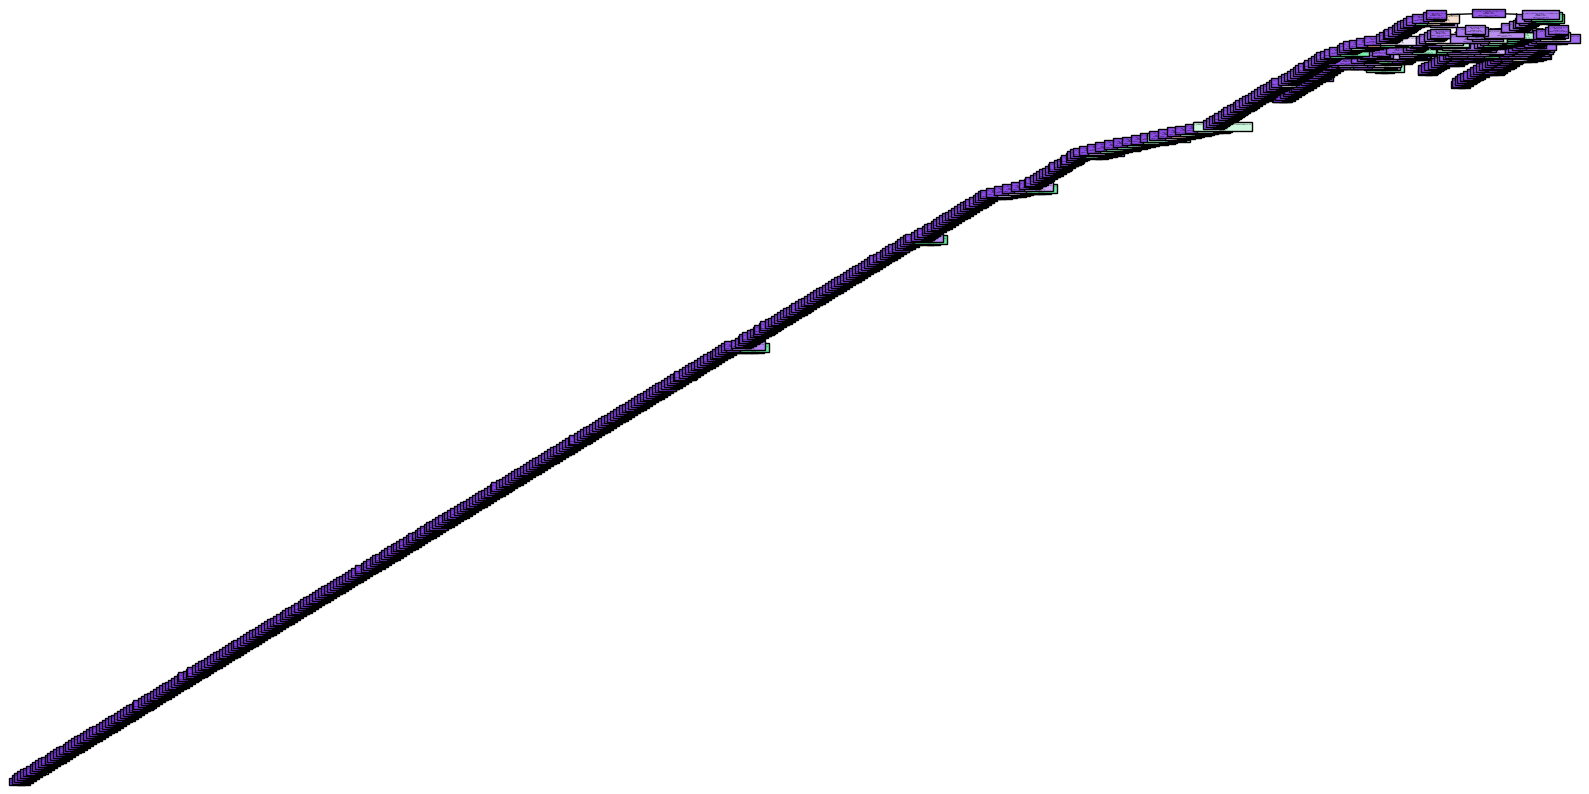

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

label_encoder = LabelEncoder()
df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])

X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']


categorical_variables = X.columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_variables)]
)

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)


cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)


y_pred = cart_model.predict(X_test)


def cart_report(test, pred):
    print("Accuracy: ", accuracy_score(test, pred))
    print("Confusion Matrix:\n", confusion_matrix(test, pred))
    print("Classification Report:\n", classification_report(test, pred))


cart_report(y_test, y_pred)


plt.figure(figsize=(20,10))
plot_tree(cart_model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=label_encoder.classes_.astype(str))
plt.show()


In [34]:
label_encoder = LabelEncoder()
df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])

X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']


categorical_variables = X.columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_variables)]
)

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)


cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)


y_pred = cart_model.predict(X_test)


def cart_report(test, pred):
    print("Accuracy: ", accuracy_score(test, pred))
    print("Confusion Matrix:\n", confusion_matrix(test, pred))
    print("Classification Report:\n", classification_report(test, pred))


cart_report(y_test, y_pred)





Accuracy:  0.8700771416971174
Confusion Matrix:
 [[   6    2   16]
 [   2   70  242]
 [   4   54 2067]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33        24
           1       0.56      0.22      0.32       314
           2       0.89      0.97      0.93      2125

    accuracy                           0.87      2463
   macro avg       0.65      0.48      0.53      2463
weighted avg       0.84      0.87      0.85      2463



In [36]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train_smote, y_train_smote)


y_pred = cart_model.predict(X_test)


def cart_report(test, pred):
    print("Accuracy: ", accuracy_score(test, pred))
    print("Confusion Matrix:\n", confusion_matrix(test, pred))
    print("Classification Report:\n", classification_report(test, pred))

cart_report(y_test, y_pred)



Accuracy:  0.8363784003248071
Confusion Matrix:
 [[   2    1   21]
 [   1   48  265]
 [   9  106 2010]]
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.08      0.11        24
           1       0.31      0.15      0.20       314
           2       0.88      0.95      0.91      2125

    accuracy                           0.84      2463
   macro avg       0.45      0.39      0.41      2463
weighted avg       0.80      0.84      0.81      2463



In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Encode the target variable
label_encoder = LabelEncoder()
df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])

# Prepare features and target
X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']

# List of categorical variables
categorical_variables = X.columns.tolist()

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_variables)]
)

# Transform features
X_encoded = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define a function to print evaluation metrics
def cart_report(test, pred):
    print("Accuracy: ", accuracy_score(test, pred))
    print("Confusion Matrix:\n", confusion_matrix(test, pred))
    print("Classification Report:\n", classification_report(test, pred))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'class_weight': [None, 'balanced', {0: 5, 1: 2, 2: 1}]
}

# Initialize the GridSearchCV object with the decision tree classifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=1)  # Use n_jobs=1

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)

# Print evaluation metrics
cart_report(y_test, y_pred)

# Plot the best decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=label_encoder.classes_.astype(str))
plt.show()

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


KeyboardInterrupt: 